# SLURM full aggregated data analysis

This notebook will run statistic information on the whole aggregated slurm dataset jobs to gain insights on the job system

In [57]:
import pandas as pd
import numpy as np
from datetime import timedelta
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
slurm = pd.read_csv("/mnt/scratch/alkhali7/DID_FINAL_SLURM_OCT_2023_aggregated.csv", delimiter=",")

/tmp/local/33544700/ipykernel_71786/1776628446.py:1: DtypeWarning: Columns (21) have mixed types. Specify dtype option on import or set low_memory=False.
  slurm = pd.read_csv("/mnt/scratch/alkhali7/DID_FINAL_SLURM_OCT_2023_aggregated.csv", delimiter=",")


In [3]:
slurm.head()

,Unnamed: 0,JobID,User,Group,Submit,Start,End,Elapsed,State,Account,...,CPUTimeRAW,ReqCPUS,AllocCPUS,ReqMem,MaxRSS,ReqNodes,NNodes,NodeList,ReqTRES,AllocTRES
0,0,31496544,user_679,group_121,2023-03-21T11:13:45,Unknown,Unknown,00:00:00,PENDING,account_017,...,0,28,0,21000M,NaN,1,1,None assigned,"billing=3192,cpu=28,gres/gpu=4,mem=21000M,node=1",NaN
1,1,31497932,user_679,group_121,2023-03-21T11:31:18,Unknown,Unknown,00:00:00,PENDING,account_017,...,0,28,0,21000M,NaN,1,1,None assigned,"billing=3192,cpu=28,gres/gpu=4,mem=21000M,node=1",NaN
2,2,31993628,user_105,group_114,2023-03-22T18:19:12,Unknown,Unknown,00:00:00,PENDING,account_017,...,0,12,0,150G,NaN,1,1,None assigned,"billing=23347,cpu=12,gres/gpu=8,mem=150G,node=1",NaN
3,3,39087660,user_652,group_054,2023-04-04T13:09:10,Unknown,Unknown,00:00:00,PENDING,account_017,...,0,640,0,20G,NaN,10,10,None assigned,"billing=3112,cpu=640,mem=20G,node=10",NaN
4,4,59062820,user_188,group_046,2023-05-08T09:58:20,2024-01-01T00:58:57,2024-01-01T00:59:06,00:00:09,COMPLETED,account_017,...,360,40,40,8G,NaN,1,1,skl-029,"billing=1245,cpu=40,mem=8G,node=1","billing=1245,cpu=40,mem=8G,node=1"


In [4]:
# slurm.info()
print(slurm.columns)
print(slurm.shape)

Index(['Unnamed: 0', 'JobID', 'User', 'Group', 'Submit', 'Start', 'End',
       'Elapsed', 'State', 'Account', 'AssocID', 'Partition', 'Timelimit',
       'UserCPU', 'SystemCPU', 'TotalCPU', 'CPUTime', 'CPUTimeRAW', 'ReqCPUS',
       'AllocCPUS', 'ReqMem', 'MaxRSS', 'ReqNodes', 'NNodes', 'NodeList',
       'ReqTRES', 'AllocTRES'],
      dtype='object')
(3369222, 27)


In [5]:
slurm.Timelimit    # needs a function to seperate - from time

0            03:00:00
1            03:00:00
2            04:00:00
3            00:10:00
4          2-00:00:00
              ...    
3369217      01:00:00
3369218      01:00:00
3369219      00:10:00
3369220      00:10:00
3369221      00:10:00
Name: Timelimit, Length: 3369222, dtype: object

In [6]:
slurm.ReqMem

0           21000M
1           21000M
2             150G
3              20G
4               8G
            ...   
3369217    505202M
3369218    505202M
3369219        20G
3369220        20G
3369221        20G
Name: ReqMem, Length: 3369222, dtype: object

# Preprocessing

In [31]:
# # Filter out rows where 'State' is "Cancelled" or Unknown
slurm = slurm[slurm['State'] != 'Cancelled']
slurm = slurm[slurm['Start']!= 'Unknown']

slurm['Submit'] = pd.to_datetime(slurm['Submit'])
slurm['Start'] = pd.to_datetime(slurm['Start'])
slurm['End'] = pd.to_datetime(slurm['Start'])

In [8]:
slurm.head()

,Unnamed: 0,JobID,User,Group,Submit,Start,End,Elapsed,State,Account,...,CPUTimeRAW,ReqCPUS,AllocCPUS,ReqMem,MaxRSS,ReqNodes,NNodes,NodeList,ReqTRES,AllocTRES
4,4,59062820,user_188,group_046,2023-05-08 09:58:20,2024-01-01 00:58:57,2024-01-01 00:58:57,00:00:09,COMPLETED,account_017,...,360,40,40,8G,NaN,1,1,skl-029,"billing=1245,cpu=40,mem=8G,node=1","billing=1245,cpu=40,mem=8G,node=1"
5,5,59062828,user_188,group_046,2023-05-08 09:58:20,2024-01-01 01:00:49,2024-01-01 01:00:49,00:00:06,COMPLETED,account_017,...,240,40,40,8G,NaN,1,1,skl-029,"billing=1245,cpu=40,mem=8G,node=1","billing=1245,cpu=40,mem=8G,node=1"
6,6,59062836,user_188,group_046,2023-05-08 09:58:20,2024-01-01 01:00:49,2024-01-01 01:00:49,00:00:06,COMPLETED,account_017,...,240,40,40,8G,NaN,1,1,skl-030,"billing=1245,cpu=40,mem=8G,node=1","billing=1245,cpu=40,mem=8G,node=1"
7,7,59062844,user_188,group_046,2023-05-08 09:58:21,2024-01-01 00:58:57,2024-01-01 00:58:57,00:00:09,COMPLETED,account_017,...,360,40,40,8G,NaN,1,1,amr-207,"billing=1245,cpu=40,mem=8G,node=1","billing=1245,cpu=40,mem=8G,node=1"
8,8,59062852,user_188,group_046,2023-05-08 09:58:21,2024-01-01 00:58:57,2024-01-01 00:58:57,00:00:09,COMPLETED,account_017,...,360,40,40,8G,NaN,1,1,amr-207,"billing=1245,cpu=40,mem=8G,node=1","billing=1245,cpu=40,mem=8G,node=1"


In [23]:
# convert ReqMem to a uniform measurement to MB (assuming 'M' for MB and 'G' for GB and 'K' for KB)
def convert_memory(mem_str):
    '''
    Convert memory units to MegaBytes unit float.
    '''
    if isinstance(mem_str, (int, float, complex)):   # if its a numeric type zero
        return float(mem_str)
    elif mem_str.endswith('M'):
        return float(mem_str[:-1]) # remove 'M' and convert to float
    elif mem_str.endswith('K'):
        return float(mem_str[:-1]) / 1000
    elif mem_str.endswith('G'):
        return float(mem_str[:-1]) * 1e3  # convert MB to KB
    elif mem_str.endswith('T'):
        return float(mem_str[:-1]) * 1e6 # convert MB to T
    else:
        return float(mem_str)    # when its a string zero '0'


In [24]:
# First drop rows with NA requested memory
slurm= slurm.dropna(subset=['ReqMem'])
slurm= slurm.dropna(subset=['MaxRSS'])


slurm['ReqMem_MB'] = slurm['ReqMem'].apply(convert_memory)
slurm['MaxRSS_MB'] = slurm['MaxRSS'].apply(convert_memory)


In [29]:
# size after this much preprocessing
slurm.shape

(1449982, 29)

In [36]:
# Function to parse time data columns: TimeLimit and Elapsed
def parse_time_string(time_str):
    """Convert a time string into a timedelta object."""
    days = 0
    if '-' in time_str:
        days, time_str = time_str.split('-')
        days = int(days)

    parts = time_str.split(':')
    hours, minutes, seconds = map(int, parts) if len(parts) == 3 else (int(parts[0]), int(parts[1]), 0)
    return timedelta(days=days, hours=hours, minutes=minutes, seconds=seconds)

# Convert Timelimit and Elapsed to timedeltas
slurm['Timelimit'] = slurm['Timelimit'].apply(parse_time_string)
slurm['Elapsed'] = slurm['Elapsed'].apply(parse_time_string)

In [37]:
slurm.Timelimit

201       1 days 12:00:00
202       1 days 12:00:00
203       1 days 12:00:00
204       1 days 12:00:00
205       1 days 12:00:00
                ...      
3368422   4 days 04:45:00
3368600   0 days 04:00:00
3368651   4 days 04:00:00
3368698   4 days 04:00:00
3368715   4 days 04:00:00
Name: Timelimit, Length: 1449982, dtype: timedelta64[ns]

In [38]:
# Converting Timelimit and Elapsed to time delts
slurm['Elapsed'] = pd.to_timedelta(slurm['Elapsed']).dt.total_seconds() / 3600  # Convert Elapsed time to hours
slurm['Timelimit'] = pd.to_timedelta(slurm['Timelimit']).dt.total_seconds() / 3600  # Convert Elapsed time to hours

In [39]:
slurm.Timelimit

201         36.00
202         36.00
203         36.00
204         36.00
205         36.00
            ...  
3368422    100.75
3368600      4.00
3368651    100.00
3368698    100.00
3368715    100.00
Name: Timelimit, Length: 1449982, dtype: float64

In [52]:
slurm.Start

201       2023-09-29 21:30:06
202       2023-09-30 00:16:32
203       2023-09-30 01:07:56
204       2023-09-30 03:06:56
205       2023-09-30 08:13:45
                  ...        
3368422   2023-10-31 23:57:13
3368600   2023-10-31 23:56:57
3368651   2023-10-31 23:58:33
3368698   2023-10-31 23:59:11
3368715   2023-10-31 23:59:39
Name: Start, Length: 1449982, dtype: datetime64[ns]

In [53]:
slurm.End

201       2023-09-29 21:30:06
202       2023-09-30 00:16:32
203       2023-09-30 01:07:56
204       2023-09-30 03:06:56
205       2023-09-30 08:13:45
                  ...        
3368422   2023-10-31 23:57:13
3368600   2023-10-31 23:56:57
3368651   2023-10-31 23:58:33
3368698   2023-10-31 23:59:11
3368715   2023-10-31 23:59:39
Name: End, Length: 1449982, dtype: datetime64[ns]

# Predicting Queue Time

In [55]:
# Calculate queutime in hours
slurm["QueueTime_minutes"] = (slurm['Start']- slurm['Submit']).dt.total_seconds()/60

slurm.head(5)

,Unnamed: 0,JobID,User,Group,Submit,Start,End,Elapsed,State,Account,...,ReqNodes,NNodes,NodeList,ReqTRES,AllocTRES,ReqMem_MB,MaxRSS_MB,QueueTime (Minutes),QueueTime,QueueTime_minutes
201,201,87461884,user_600,group_090,2023-09-08 18:34:09,2023-09-29 21:30:06,2023-09-29 21:30:06,32.208611,COMPLETED,account_011,...,4,4,"lac-[084-086,193]","billing=4980,cpu=64,gres/gpu=4,mem=32G,node=4","billing=4980,cpu=64,gres/gpu=4,mem=32G,node=4",32000.0,4.500,506.932500,30415.950000,30415.950000
202,202,87461892,user_600,group_090,2023-09-08 18:34:11,2023-09-30 00:16:32,2023-09-30 00:16:32,30.052222,COMPLETED,account_011,...,4,4,"lac-[142,192,345,349]","billing=4980,cpu=64,gres/gpu=4,mem=32G,node=4","billing=4980,cpu=64,gres/gpu=4,mem=32G,node=4",32000.0,4.540,509.705833,30582.350000,30582.350000
203,203,87461900,user_600,group_090,2023-09-08 18:34:13,2023-09-30 01:07:56,2023-09-30 01:07:56,29.433611,COMPLETED,account_011,...,4,4,"lac-[080-081,342-343]","billing=4980,cpu=64,gres/gpu=4,mem=32G,node=4","billing=4980,cpu=64,gres/gpu=4,mem=32G,node=4",32000.0,4.536,510.561944,30633.716667,30633.716667
204,204,87461908,user_600,group_090,2023-09-08 18:34:15,2023-09-30 03:06:56,2023-09-30 03:06:56,30.151667,COMPLETED,account_011,...,4,4,"lac-[031,136,346-347]","billing=4980,cpu=64,gres/gpu=4,mem=32G,node=4","billing=4980,cpu=64,gres/gpu=4,mem=32G,node=4",32000.0,4.540,512.544722,30752.683333,30752.683333
205,205,87461916,user_600,group_090,2023-09-08 18:34:18,2023-09-30 08:13:45,2023-09-30 08:13:45,30.278611,COMPLETED,account_011,...,4,4,"lac-[083,196,344,348]","billing=4980,cpu=64,gres/gpu=4,mem=32G,node=4","billing=4980,cpu=64,gres/gpu=4,mem=32G,node=4",32000.0,4.604,517.657500,31059.450000,31059.450000


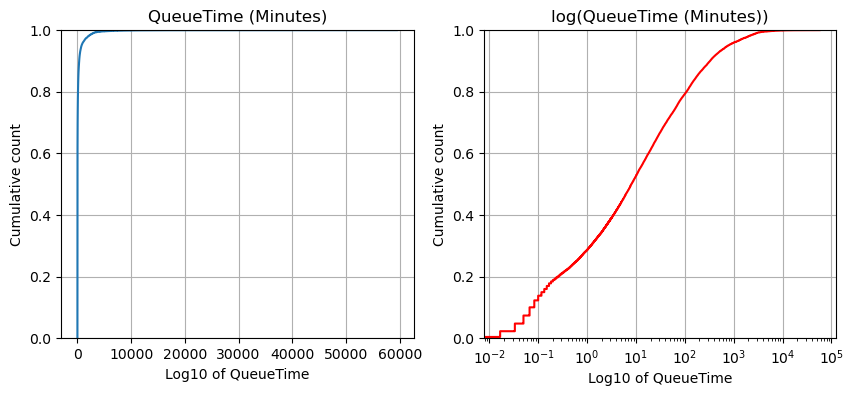

In [73]:
fig, axes = plt.subplots(1, 2, figsize=(10, 4))  # 1 row, 2 columns


sns.ecdfplot(slurm['QueueTime_minutes'], ax=axes[0])

axes[0].set_xlabel('Log10 of QueueTime')
axes[0].set_ylabel('Cumulative count')
axes[0].set_title('QueueTime (Minutes)')
axes[0].grid(True) 

# same plot but log scaled
sns.ecdfplot(slurm['QueueTime_minutes'], ax=axes[1], color='red')


axes[1].set_xscale('log')              # For setting y-axis to log base 10
axes[1].set_xlabel('Log10 of QueueTime')
axes[1].set_ylabel('Cumulative count')
axes[1].set_title('log(QueueTime (Minutes))')
axes[1].grid(True) 

plt.show()